### Unit 1 Capstone - Narrative Analytics and Experimentation
### DATA: Marketing Campaign, Promotion Effectiveness – Fast Food Chain

Author: Will Becerra <br>
Email: willbecerra@yahoo.com <br>
Mentor: Yunus Bulut <br>
Date: April, 2018

Task: Create a research proposal to propose and outline an experiment plan.

Experiment: Analyze test market campaigns and promotions based on: 
- sales
- locations
- other key metrics  

Goal: Predict which customers will respond to which campaign by which channel and why.  Then, test predictions with another round of promotions.  Success will be measured on the 2nd round of promotions coming within 15% or above of expected results.

Business goal: Increase the likelihood of responses and quality of leads in future campaigns.

### Scenario

A fast food chain plans to add a new item to its menu. However, they're still undecided between three possible marketing campaigns for promoting the new product.

Data Source: <br>
IBM posted data for potential Watson Analytics customers to test IBM's analytics product.  The intention for the data set is for Watson users to see how well IBM's product performs in facilitiating analysis of marketing campaign effectiviness.

Variables: <br>
MarketID - Unique identifier for market <br>
MarketSize - Size of market area by sales <br>
LocationID - Unique identifier for store location <br>
AgeOfStore - Age of store in years <br>
Promotion - One of three promotions that was tested <br>
week - One of four weeks when the promotions were run, capturing sales of new product over four weeks <br>
SalesInThousands - Sales amount for a specific LocationID, Promotion and week <br>

### Question: “What drives sales?” 

### The Plan

The plan is to review sales information for small, medium and large locations in 10 different markets for a period of 1 month, over 3 different promotions, and measure the effectiveness of these promotions over a 4 week period.  Then, to test these promotions in the same markets to determine efficacy.

Initial data collection: <br>
In order to determine which promotion had the greatest effect on sales, the new item was introduced at locations in several randomly selected markets. A different promotion was used at each location, and the weekly sales of the new item was recorded for the first four weeks.  This set a baseline for future tests of promotions.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import scipy.stats as stats
import statistics
from scipy.stats import ttest_ind

In [2]:
df = pd.read_csv('marketing_campaign.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 7 columns):
MarketID            548 non-null int64
MarketSize          548 non-null object
LocationID          548 non-null int64
AgeOfStore          548 non-null int64
Promotion           548 non-null int64
Week                548 non-null int64
SalesInThousands    548 non-null float64
dtypes: float64(1), int64(5), object(1)
memory usage: 27.9+ KB


In [4]:
df.columns

Index(['MarketID', 'MarketSize', 'LocationID', 'AgeOfStore', 'Promotion',
       'Week', 'SalesInThousands'],
      dtype='object')

In [5]:
df.columns = df.columns.str.lower()
df.columns

Index(['marketid', 'marketsize', 'locationid', 'ageofstore', 'promotion',
       'week', 'salesinthousands'],
      dtype='object')

In [6]:
df.head()

,marketid,marketsize,locationid,ageofstore,promotion,week,salesinthousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81


In [7]:
df.dtypes

marketid              int64
marketsize           object
locationid            int64
ageofstore            int64
promotion             int64
week                  int64
salesinthousands    float64
dtype: object

In [8]:
df.isnull().sum()/df.count()

marketid            0.0
marketsize          0.0
locationid          0.0
ageofstore          0.0
promotion           0.0
week                0.0
salesinthousands    0.0
dtype: float64

In [9]:
df.head()

,marketid,marketsize,locationid,ageofstore,promotion,week,salesinthousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81


In [10]:
print(df.marketid.nunique())
print(df.marketid.unique())

10
[ 1  2  3  4  5  6  7  8  9 10]


In [11]:
df.marketsize.unique()

array(['Medium', 'Small', 'Large'], dtype=object)

In [12]:
df['ageofstore'].describe()

count    548.000000
mean       8.503650
std        6.638345
min        1.000000
25%        4.000000
50%        7.000000
75%       12.000000
max       28.000000
Name: ageofstore, dtype: float64

In [13]:
df.promotion.unique()

array([3, 2, 1], dtype=int64)

In [14]:
df.week.unique()

array([1, 2, 3, 4], dtype=int64)

In [15]:
df['salesinthousands'].describe()

count    548.000000
mean      53.466204
std       16.755216
min       17.340000
25%       42.545000
50%       50.200000
75%       60.477500
max       99.650000
Name: salesinthousands, dtype: float64

There are 10 Markets, classified as small medium and large.  The maximum age of the stores is 28 years.  There were 3 different promotions over a 4 week period.

MarketID
- Unique identifier for market (1 – 10).

MarketSize
- Size of market area by sales (Small, Medium, Large).

LocationID
- Unique identifier for store location.

AgeOfStore
- Age of store in years (1 – 28).

Promotion
- One of three promotions that was tested (1, 2, 3).

week
- One of four weeks when the promotions were run (1 – 4). 
- Company captured sales of new product over four weeks.

SalesInThousands
- Sales amount for a specific LocationID, Promotion and week.

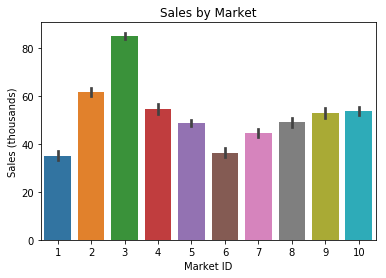

In [16]:
sns.barplot(x="marketid", y="salesinthousands", data=df);

plt.xlabel('Market ID')
plt.ylabel('Sales (thousands)')
plt.title('Sales by Market')

plt.show()

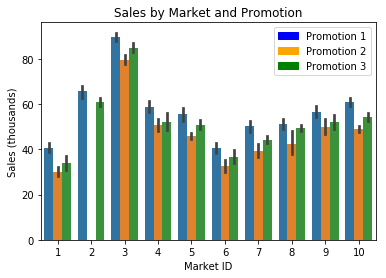

In [17]:
sns.barplot(x="marketid", y="salesinthousands", hue="promotion", data=df);
p1 = mpatches.Patch(color='blue', label='Promotion 1')
p2 = mpatches.Patch(color='orange', label='Promotion 2')
p3 = mpatches.Patch(color='green', label='Promotion 3')
plt.legend(handles=[p1, p2, p3], loc='upper right')

plt.xlabel('Market ID')
plt.ylabel('Sales (thousands)')
plt.title('Sales by Market and Promotion')

plt.show()

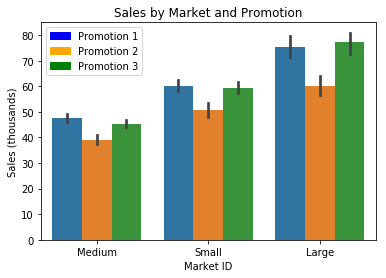

In [18]:
sns.barplot(x="marketsize", y="salesinthousands", hue="promotion", data=df);
p1 = mpatches.Patch(color='blue', label='Promotion 1')
p2 = mpatches.Patch(color='orange', label='Promotion 2')
p3 = mpatches.Patch(color='green', label='Promotion 3')
plt.legend(handles=[p1, p2, p3], loc='upper left')

plt.xlabel('Market ID')
plt.ylabel('Sales (thousands)')
plt.title('Sales by Market and Promotion')

plt.show()

In [19]:
pivoted = df.pivot_table(index=['locationid','promotion'], values = 'salesinthousands', columns = 'week')
pivoted2 = pivoted.reset_index()
pivoted2.head()

week,locationid,promotion,1,2,3,4
0,1,3,33.73,35.67,29.03,39.25
1,2,2,27.81,34.67,27.98,27.72
2,3,1,44.54,37.94,45.49,34.75
3,4,2,39.28,39.80,24.77,30.98
4,5,2,30.37,24.82,37.47,23.35


In [20]:
pivoted2['week_two_minus_one'] = pivoted2[2] - pivoted2[1]
pivoted2['week_three_minus_one'] = pivoted2[3] - pivoted2[1]
pivoted2['week_four_minus_one'] = pivoted2[4] - pivoted2[1]
pivoted2.head()

week,locationid,promotion,1,2,3,4,week_two_minus_one,week_three_minus_one,week_four_minus_one
0,1,3,33.73,35.67,29.03,39.25,1.94,-4.70,5.52
1,2,2,27.81,34.67,27.98,27.72,6.86,0.17,-0.09
2,3,1,44.54,37.94,45.49,34.75,-6.60,0.95,-9.79
3,4,2,39.28,39.80,24.77,30.98,0.52,-14.51,-8.30
4,5,2,30.37,24.82,37.47,23.35,-5.55,7.10,-7.02


In [21]:
week2_minus_week1 = pivoted2.groupby(['promotion'])['week_two_minus_one'].mean()
week3_minus_week1 = pivoted2.groupby(['promotion'])['week_three_minus_one'].mean()
week4_minus_week1 = pivoted2.groupby(['promotion'])['week_four_minus_one'].mean()

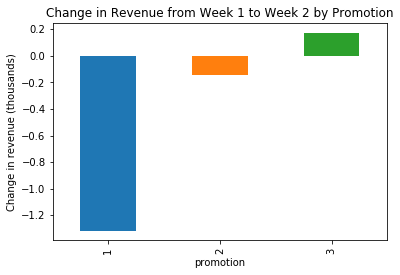

In [22]:
week2_minus_week1.plot.bar()
plt.ylabel('Change in revenue (thousands)')
plt.title('Change in Revenue from Week 1 to Week 2 by Promotion')
plt.show()

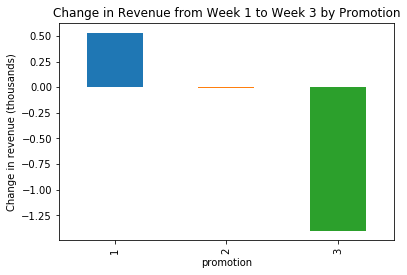

In [23]:
week3_minus_week1.plot.bar()
plt.ylabel('Change in revenue (thousands)')
plt.title('Change in Revenue from Week 1 to Week 3 by Promotion')
plt.show()

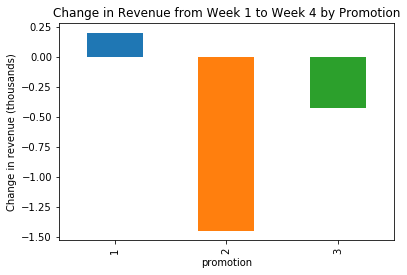

In [24]:
week4_minus_week1.plot.bar()
plt.ylabel('Change in revenue (thousands)')
plt.title('Change in Revenue from Week 1 to Week 4 by Promotion')
plt.show()

We didn't have a baseline revenue number, but if we look at the change in revenue over time: 
- promotion 1 had an initial decrease, then consistent revenue growth per week
- promotion 2 had a negative trend in sales over all 4 weeks
- promotion 3 had an initial small increase, then decreases in revenue through the fourth week.

This  high level analysis above gives a glimpse into how well promotions did per market and with respect to each other.  
While outside the scope of the Research Proposal assignment, an initial run through of the available data informs the development of proposal scope.